<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Natural-Language-Processing/blob/master/BBC_Labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing the Libraries**

In [1]:
import tensorflow as tf
print(tf.__version__)

# To install tensorflow 2.0
# !pip install tensorflow==2.0.0-beta0

# If tensorflow version is less than 2.0.0
tf.enable_eager_execution()

# To install tensorflow dataset library : !pip install -q tensorflow-datasets

1.15.0


**Loading the Data**


In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-03-22 18:57:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2020-03-22 18:57:44 (175 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



Extracting the labels and news from loaded dataset

In [0]:
import csv

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

sentences = []
labels = []
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)

In [4]:
print(len(labels))
print(len(sentences))

2225
2225


In total 5 Labels are present

In [5]:
import numpy as np
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[['business' '510']
 ['entertainment' '386']
 ['politics' '417']
 ['sport' '511']
 ['tech' '401']]


Splitting the data into 0.8 training and 0.2 test

In [0]:
training_size = 1780
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

**Preprocessing the data**

```
hyperparameters
```



In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_token = "OOV"

Padding the data

In [0]:
# Importing the Libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Fitting the tokenizer on training data
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
import numpy as np
training_padded = np.array(padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [10]:
print(training_labels[:5])

['tech' 'business' 'sport' 'sport' 'entertainment']


In [0]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(training_labels))
testing_label_seq = np.array(label_tokenizer.texts_to_sequences(testing_labels))

In [12]:
print(training_label_seq[:5])

[[4]
 [2]
 [1]
 [1]
 [5]]


In [13]:
label_word_index = label_tokenizer.word_index
print(label_word_index)

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}


Decoding the Padded Sentence

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_line(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_line(training_padded[1]))
print(training_sentences[1])

OOV boss left OOV OOV former OOV boss OOV OOV accused OOV OOV OOV OOV fraud never made OOV OOV OOV told OOV david OOV made comments OOV defence OOV OOV mr OOV not OOV OOV s problems phone company OOV 2002 OOV claim OOV OOV OOV firm s shares mr OOV already OOV OOV fraud OOV OOV monday defence OOV OOV OOV OOV OOV OOV OOV cross OOV asked mr OOV ever OOV mr OOV make OOV decision not OOV mr OOV OOV ever know mr OOV make OOV OOV OOV OOV mr OOV OOV no OOV OOV mr OOV admitted OOV OOV OOV OOV OOV former OOV chief financial OOV OOV OOV defence OOV trying OOV mr OOV
worldcom boss left books alone former worldcom boss bernie ebbers accused overseeing $11bn (£5.8bn) fraud never made accounting decisions witness told jurors. david myers made comments questioning defence lawyers arguing mr ebbers not responsible worldcom s problems. phone company collapsed 2002 prosecutors claim losses hidden protect firm s shares. mr myers already pleaded guilty fraud assisting prosecutors. monday defence lawyer rei

**Creating the Model**

Last output is having 6 outputs because softmax outputs starting from 0, 1, 2, 3, 4, 5 (we have 1, 2, 3, 4, 5)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


Training corpus

In [16]:
num_epochs = 30
history = model.fit(training_padded, training_label_seq, epochs=num_epochs, validation_data=(testing_padded, testing_label_seq), verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 - 4s - loss: 1.7599 - acc: 0.2433 - val_loss: 1.7155 - val_acc: 0.3798
Epoch 2/30
1780/1780 - 0s - loss: 1.6722 - acc: 0.3764 - val_loss: 1.6167 - val_acc: 0.4292
Epoch 3/30
1780/1780 - 0s - loss: 1.5676 - acc: 0.4697 - val_loss: 1.5055 - val_acc: 0.4966
Epoch 4/30
1780/1780 - 0s - loss: 1.4260 - acc: 0.5961 - val_loss: 1.3424 - val_acc: 0.6090
Epoch 5/30
1780/1780 - 0s - loss: 1.2290 - acc: 0.6921 - val_loss: 1.1364 - val_acc: 0.7483
Epoch 6/30
1780/1780 - 0s - loss: 1.0086 - acc: 0.7770 - val_loss: 0.9329 - val_acc: 0.7978
Epoch 7/30
1780/1780 - 0s - loss: 0.8091 - acc: 0.8185 - val_loss: 0.7642 - val_acc: 0.8719
Epoch 8/30
1780/1780 - 0s - loss: 0.6487 - acc: 0.9028 - val_loss: 0.6324 - val_acc: 0.9101
Epoch 9/30
1780/1780 - 0s - loss: 0.5231 - acc: 0.9309 - val_loss: 0.5344 - val_acc: 0.9169
Epoch 10/30
1780/1780 - 0s - loss: 0.4250 - acc: 0.9517 - val_loss: 0.4537 - val_acc: 0.9281
Epoch 11/30
1780/1780 - 0s - los

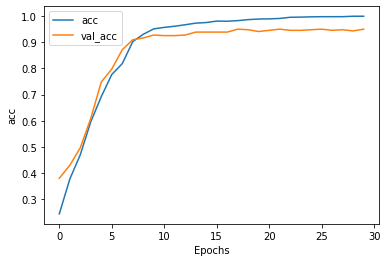

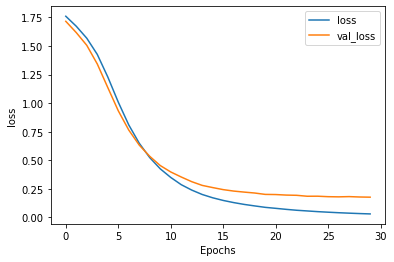

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [18]:
test_sentence = ["worldcom boss left books alone former worldcom boss bernie ebbers accused overseeing $11bn (£5.8bn) fraud never made accounting decisions witness told jurors. david myers made comments questioning defence lawyers arguing mr ebbers not responsible worldcom s problems. phone company collapsed 2002 prosecutors claim losses hidden protect firm s shares. mr myers already pleaded guilty fraud assisting prosecutors. monday defence lawyer reid weingarten tried distance client allegations. cross examination asked mr myers ever knew mr ebbers make accounting decision . not aware mr myers replied. ever know mr ebbers make accounting entry worldcom books mr weingarten pressed. no replied witness. mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan. defence lawyers trying paint mr sullivan admitted fraud will testify later trial mastermind behind worldcom s accounting house cards. mr ebbers team meanwhile looking portray affable boss admission pe graduate economist. whatever abilities mr ebbers transformed worldcom relative unknown $160bn telecoms giant investor darling late 1990s. worldcom s problems mounted however competition increased telecoms boom petered out. firm finally collapsed shareholders lost $180bn 20 000 workers lost jobs. mr ebbers trial expected last two months found guilty former ceo faces substantial jail sentence. firmly declared innocence."]

sequences = tokenizer.texts_to_sequences(test_sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded = np.array(padded)

def get_index(list):
  count = 0
  for x in list:
    if x == 1.:
      break
    count += 1
  return count

# Making the prediction
key_list = list(label_word_index.keys()) 
val_list = list(label_word_index.values()) 
print(key_list[val_list.index(get_index(np.around(model.predict(padded))[0]))])

business


Embedding files (vecs and meta)

In [20]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')